In [16]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# create dict from json
PATH_POINTS='C:/Users/Owner/Desktop/projects/ML\chapter_2\scan_points.json'
PATH_POINTS_CSL='C:/Users/Owner/Desktop/projects/ML\chapter_2\scan_points.csv'
with open(PATH_POINTS) as json_file:
    data = json.load(json_file)
#print(data) # 'node_points'


    



In [8]:
## creates csv file


with open(PATH_POINTS_CSL, 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["node", "x", "y"]
    writer.writerow(field)
    for node,info in data.items():
        print(node,info['node_points'][0])
        for x,y in info['node_points']:
            writer.writerow([node,x, y])

1 [-6.74, 58.61]
2 [113.73, 7.64]
3 [9.65, -123.61]
4 [-140.47, -12.32]
5 [-4.4, 62.87]


In [87]:
# open csv with pandas
points=pd.read_csv(PATH_POINTS_CSL)
points.info()
points.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   node    827 non-null    int64  
 1   x       827 non-null    float64
 2   y       827 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 19.5 KB


<bound method NDFrame.head of      node      x      y
0       1  -6.74  58.61
1       1  -5.38  58.75
2       1  -3.97  58.87
3       1  -2.65  58.94
4       1  -1.06  58.99
..    ...    ...    ...
822     5 -11.86  65.96
823     5 -10.32  65.21
824     5  -8.49  64.46
825     5  -6.58  62.68
826     5  -5.19  62.81

[827 rows x 3 columns]>

In [123]:
train_nodes=[2]
test_nodes=[3]

train_set=points[points['node'].isin(train_nodes)]
train_set=train_set.drop('node', axis=1)

test_set=points[points['node'].isin(test_nodes)]
test_set=test_set.drop('node', axis=1)


train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 163 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       170 non-null    float64
 1   y       170 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 333 to 506
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       174 non-null    float64
 1   y       174 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


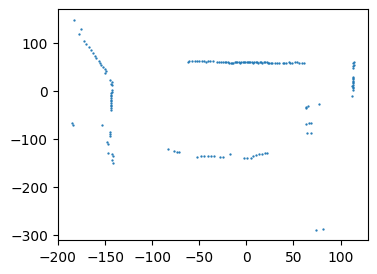

In [101]:
# visual the points
fig = plt.figure(figsize=(4,3))
plt.scatter(train_set['x'], train_set['y'],s=0.4)

In [124]:
# separate in predictors and labels
how=30
#predictors=train_set.loc[:, train_set.columns != 'y']
#predictors=train_set.loc[:, train_set.columns != 'y']
#predictors=train_set[train_set[['', 'b']]]
predictors=train_set['x'] 
labels=train_set['y']
#labels=train_set.iloc[:, 1].values 

predictors_test=test_set['x']
labels_test=test_set['y']


predictors = train_set.iloc[:, :-1].values 
labels = train_set.iloc[:, 1].values 
#print(predictors)

predictors_test = test_set.iloc[:, :-1].values 
labels_test = test_set.iloc[:, 1].values 



#predictors.info()
#labels.info()

In [125]:
### train the model
from sklearn.linear_model import RANSACRegressor
Ransac = RANSACRegressor()
# training the model
Ransac.fit(predictors, labels)



RANSACRegressor()

In [114]:
# inlier mask printing
inlier_mask = Ransac.inlier_mask_
#print(inlier_mask)

# inliers
inlier_mask = Ransac.inlier_mask_
# for loop to count
count = 0
for i in inlier_mask:
    if i==False:
        count +=1
# printing
print("Total datapoints were : ", len(inlier_mask))
print("Total outliers detected  were : ", count)

Total datapoints were :  163
Total outliers detected  were :  80


In [116]:
# predicting
preditions_Ransac = Ransac.predict(predictors_test)


In [119]:
# Importing the required module
#from sklearn.metrics import r2_score
# Evaluating the model
#print('R score is :', r2_score(labels_test, preditions_Ransac))

[ 20.92679925  20.88027914  20.84705049  21.17269126  21.18598272
  21.22253423  21.35877169  31.73607886  32.27770584  38.35854866
  38.67089796  35.23173276  35.82984845  36.59078452  37.16231729
  37.0194341   46.31681016  46.66238811  38.64431504  39.93358664
  41.17966098  42.41244387  47.78883932  48.86877043  49.90218142
  50.93891528  51.90919183  52.91934277  53.91620225  54.86986448
  55.83681818  56.76389749  57.69097681  58.66457623  59.59830128
  60.53867205  61.46907423  62.4194136   63.33652432  64.26028077
  65.2903689   66.18421956  67.11462174  68.1513556   69.07178918
  70.09855445  71.09209106  72.01917037  73.00938412  74.00292074
  75.04962319  76.11293996  77.30917134  78.35587379 107.2515072
 107.74661407 107.92604878 107.80310278 107.57714796 108.55074738
 108.61055895 108.13871213 108.12209781 108.09883775 104.28751168
 104.08149406 104.15459709 104.21440865 103.90205935 103.90538222
 103.85221638 103.77579048 103.68607313 103.55315853 103.72927038
 103.546512

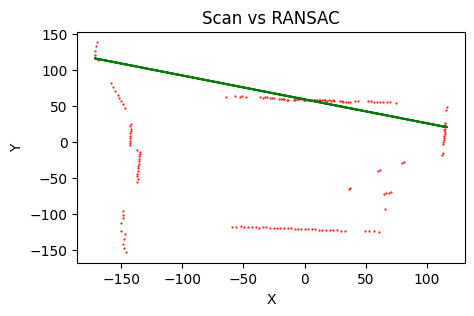

In [126]:
x=predictors
y=Ransac.predict(predictors)
print(y)
plt.figure(figsize=(5, 3))
plt.scatter(predictors, labels, color='red',s=0.3)
plt.plot(x,y , color='green')
# labeling the input and outputs
plt.title('Scan vs RANSAC')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()